In [22]:
%matplotlib notebook
#%matplotlib inline
import numpy as np
import sympy
import casadi
import modules as M
import matplotlib.pyplot as plt
import os

colorsBlue = ['#b3e5fc', '#0091ea']
colorsRed = ['#f18e86', '#e83b47']
colors = [colorsBlue, colorsRed]

In [23]:
# the following three cells are three different control sequences, with varying number of control steps

In [24]:
m = 5
x0 = [0, np.pi/2, 0, 0, 0, 0.8, 0, 0, 0, 0.05]
control_steps = 20
control_time0 = 0.3
CTL_SEQ = [0.0011004, 0.00256443, 0.00413251, 0.00561564, 0.00683201, 0.00761605, 0.00782524, 0.00734187, 0.00607752, 0.00397179, 0.000992445, -0.00286123, -0.00755131, -0.0129856, -0.0189935, -0.0252951, -0.0314742, -0.0369764, -0.0411618, -0.0434374]

In [11]:
m = 5
x0 = [0, np.pi/2, 0, 0, 0, 0.8, 0, 0, 0, 0.05]
control_steps = 15
control_time0 = 0.3
CTL_SEQ = [0.193969, 0.113565, 0.0470725, -0.00530973, -0.0441407, -0.0705652, -0.0859742, -0.091706, -0.0888708, -0.0783249, -0.0608017, -0.0372801, -0.00981094, 0.0169455, 0.0345665]

In [32]:
m = 5
x0 = [0, np.pi/2, 0, 0, 0, 0.8, 0, 0, 0, 0.05]
control_steps = 10
control_time0 = 0.3
CTL_SEQ = [3.05301, -0.167492, -1.13493, -1.26627, -1.12447, -0.904136, -0.659789, -0.312609, 0.457653, 1.89237]

In [33]:
# to make the full control sequence, we run the path followed by sigma, C2, and another sigma move

CTL_SEQ = np.array(CTL_SEQ)
FULL_CTL_SEQ = np.array([])
FULL_CTL_SEQ = np.append(FULL_CTL_SEQ, CTL_SEQ)
FULL_CTL_SEQ = np.append(FULL_CTL_SEQ, + np.flip(CTL_SEQ)) # this is a sigma mirror
FULL_CTL_SEQ = np.append(FULL_CTL_SEQ, - CTL_SEQ) # this is a C2 flip
FULL_CTL_SEQ = np.append(FULL_CTL_SEQ, - np.flip(CTL_SEQ)) # this is a sigma mirror

In [ ]:
# this cell defines the control sequence where the starting state can do either a C2 flip or a sigma mirror

In [40]:
m = 5
x0 = [0, np.pi/2, 0, 0, 0, 1.0, 0, 0, 0, 0]
control_steps = 20
control_time0 = 0.3
CTL_SEQ = [0.074762, 0.0673222, 0.0597246, 0.0518861, 0.0437588, 0.0353394, 0.0266696, 0.0178285, 0.00891866, 5.23529e-05, -0.00865588, -0.0170888, -0.02512, -0.0326083, -0.0393948, -0.0453095, -0.0501884, -0.0539022, -0.0563809, -0.0576133]

In [46]:
# to make the full control sequence, we first draw a figure 8 and then repeat it by changing the second half of the figure 8

CTL_SEQ = np.array(CTL_SEQ)
FULL_CTL_SEQ = np.array([])

# this is figure of 8 - the same as above

FULL_CTL_SEQ = np.append(FULL_CTL_SEQ, CTL_SEQ)
FULL_CTL_SEQ = np.append(FULL_CTL_SEQ, + np.flip(CTL_SEQ)) # this is a sigma mirror
FULL_CTL_SEQ = np.append(FULL_CTL_SEQ, - CTL_SEQ) # this is a C2 flip
FULL_CTL_SEQ = np.append(FULL_CTL_SEQ, - np.flip(CTL_SEQ)) # this is a sigma mirror

# this is NOT figure of 8 - note the sign change

FULL_CTL_SEQ = np.append(FULL_CTL_SEQ, CTL_SEQ)
FULL_CTL_SEQ = np.append(FULL_CTL_SEQ, + np.flip(CTL_SEQ)) # this is a sigma mirror
FULL_CTL_SEQ = np.append(FULL_CTL_SEQ, + CTL_SEQ) # this is ANOTHER sigma mirror
FULL_CTL_SEQ = np.append(FULL_CTL_SEQ, + np.flip(CTL_SEQ)) # this is a sigma mirror

In [47]:
# get EOM for cyr wheel of mass m and control u.
casadi_EOM, x, u = M.get_casadi_EOM(m)

# the energy function of a state
energy_EQN = M.energy(m)

In [48]:
ode = {}
ode['x'] = x
ode['p'] = u
ode['ode'] = casadi.vertcat(*casadi_EOM)

dt = 1e-2
tt_sim = np.arange(0, int(control_time0/dt) * dt + dt, dt)
simulator = casadi.integrator('S','cvodes', ode, 0, tt_sim[1:])

In [49]:
traj_ss = np.array([x0])
X = traj_ss[0]

for k in range(len(FULL_CTL_SEQ)):
    res = simulator(x0 = X, p = FULL_CTL_SEQ[k])
    output = np.array(res["xf"]).T
    traj_ss = np.vstack([traj_ss, output])
    X = output[-1]

traj_CT = []
traj_GC = []
for i in range(len(traj_ss)):
    traj_CT.append(M.CT(traj_ss[i]))
    traj_GC.append(M.GC(traj_ss[i]))
traj_CT = np.array(traj_CT)
traj_GC = np.array(traj_GC)

<IPython.core.display.Javascript object>


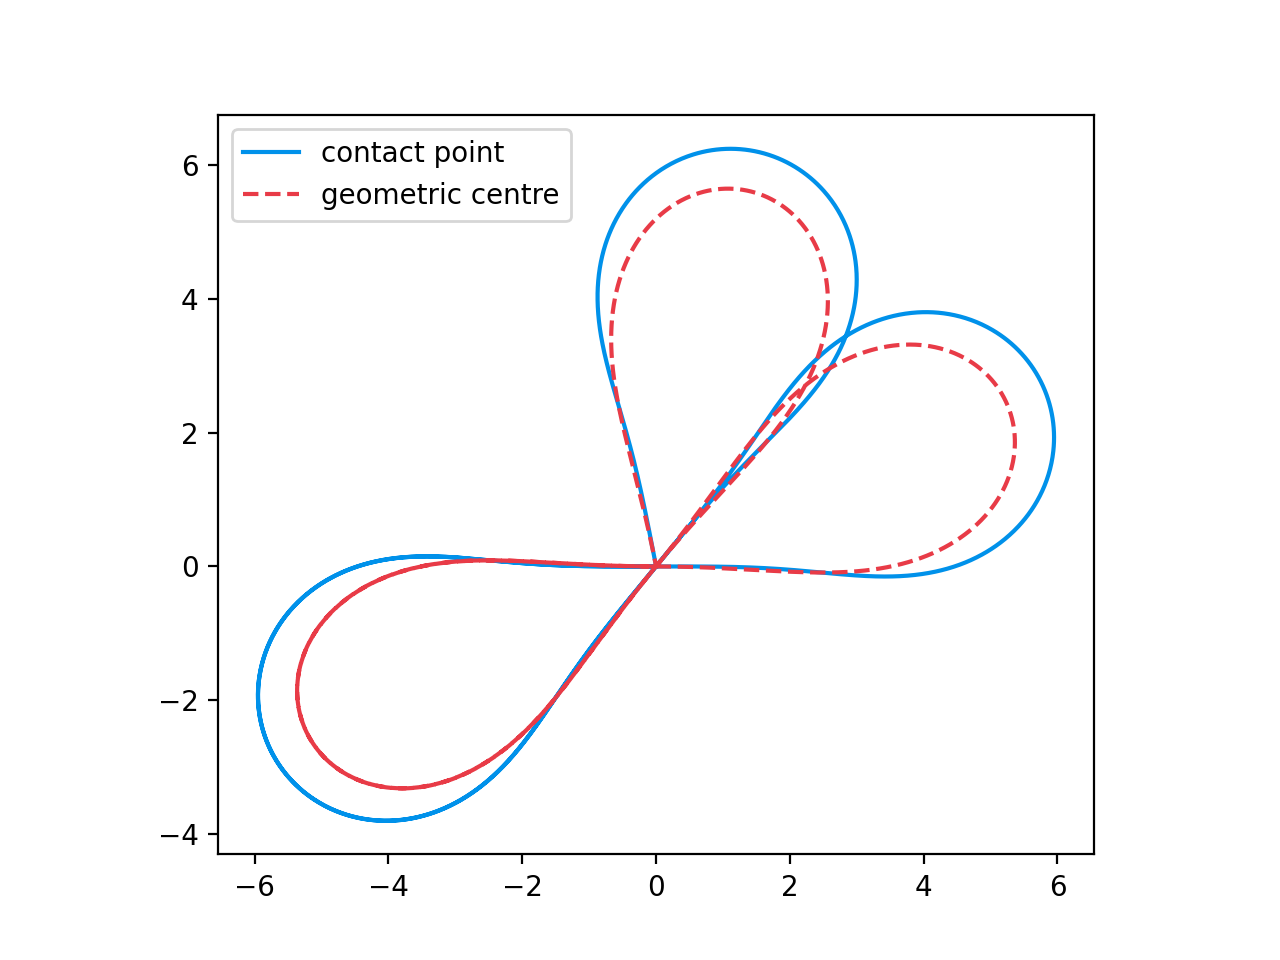

In [50]:
# plot the ConTact point trajectory and the Geometric Centre trajectory
plt.figure()
plt.axes().set_aspect(1)
plt.plot(traj_CT.T[0], traj_CT.T[1], color = colors[0][1], label = 'contact point')
plt.plot(traj_GC.T[0], traj_GC.T[1], color = colors[1][1], linestyle = 'dashed', label = 'geometric centre')
plt.legend()

<IPython.core.display.Javascript object>


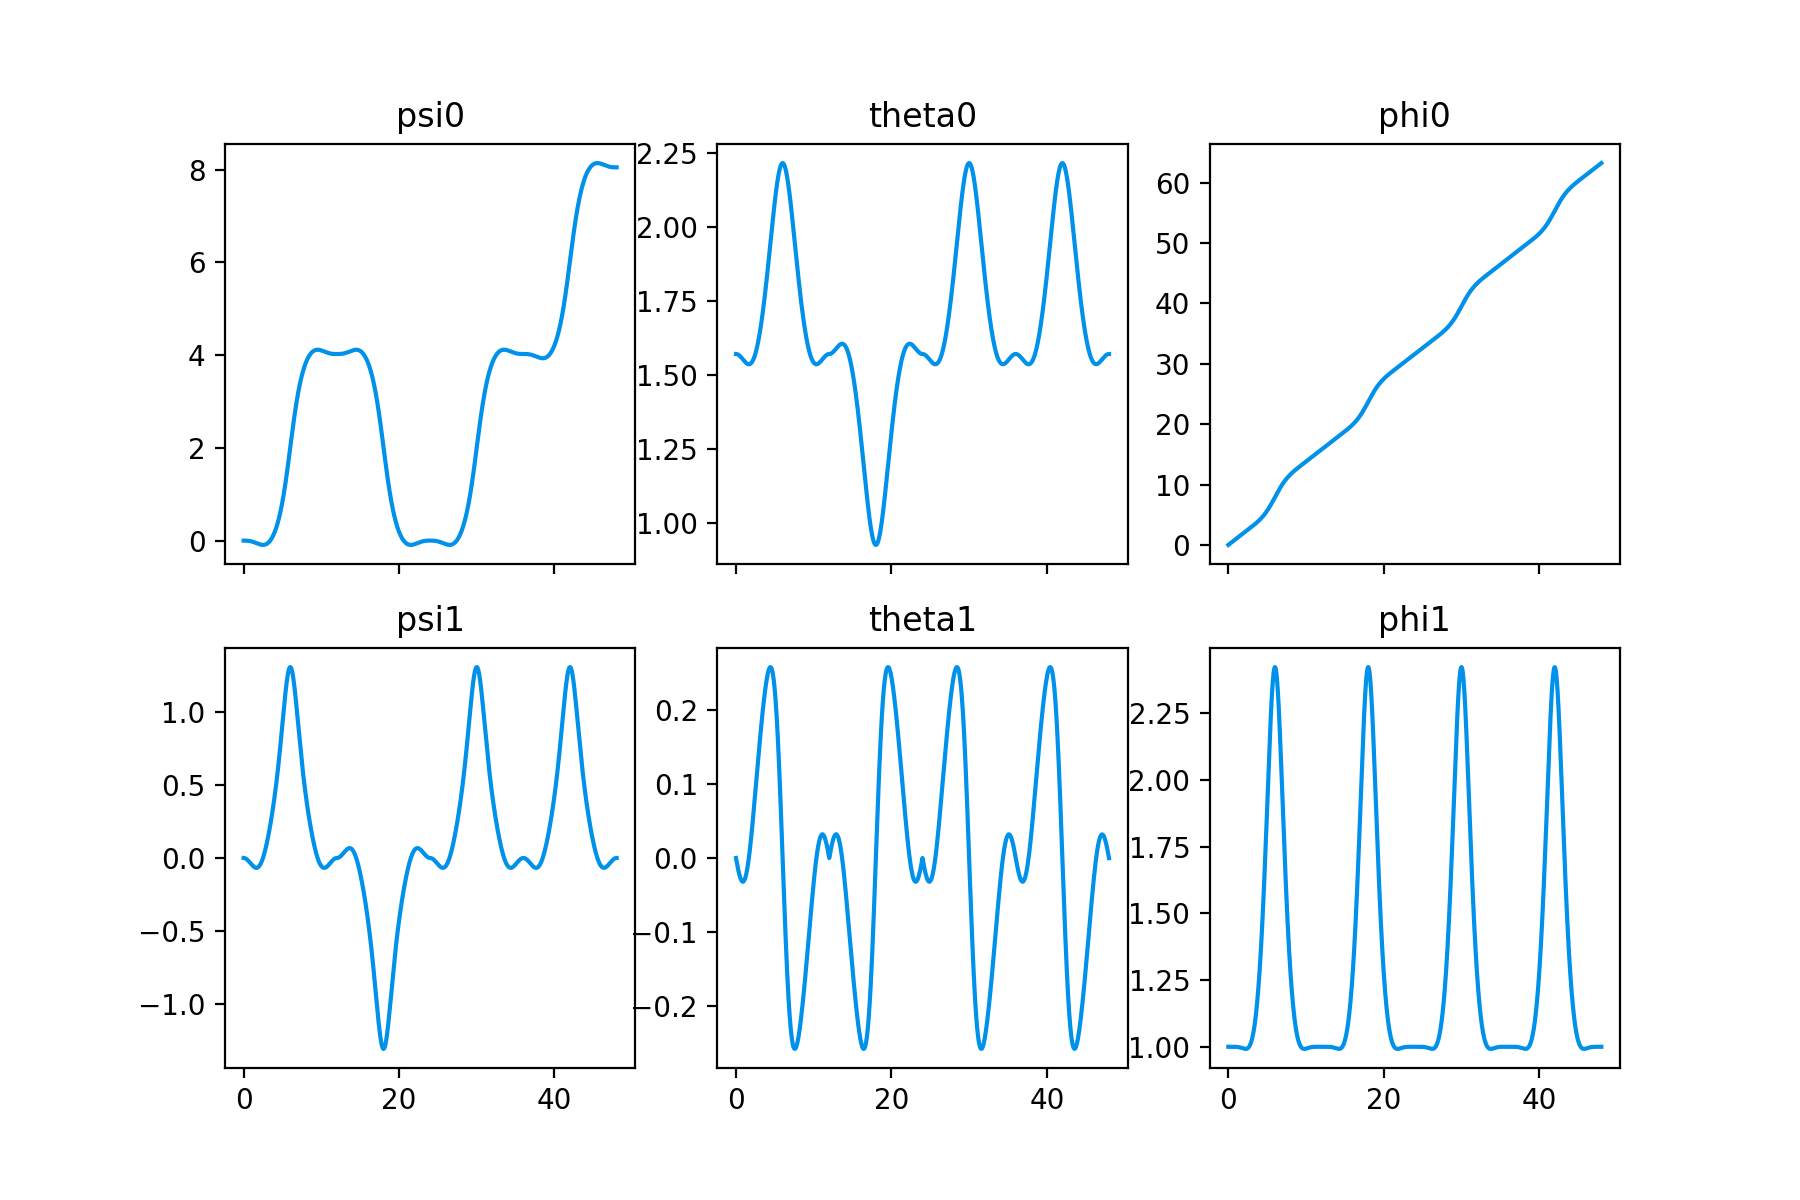

In [51]:
# plots of Euler angles and angular velocities

fig, axes = plt.subplots(2, 3, figsize = (9, 6), sharex = True)
axes = np.reshape(axes, -1)

qty = ['psi0', 'theta0', 'phi0', 'psi1', 'theta1', 'phi1']

for i in range(6):
    axes[i].plot(np.arange(0,dt*(len(traj_ss) - 0.5),dt), traj_ss.T[i], color = colors[0][1])
    axes[i].set_title(qty[i])

<IPython.core.display.Javascript object>


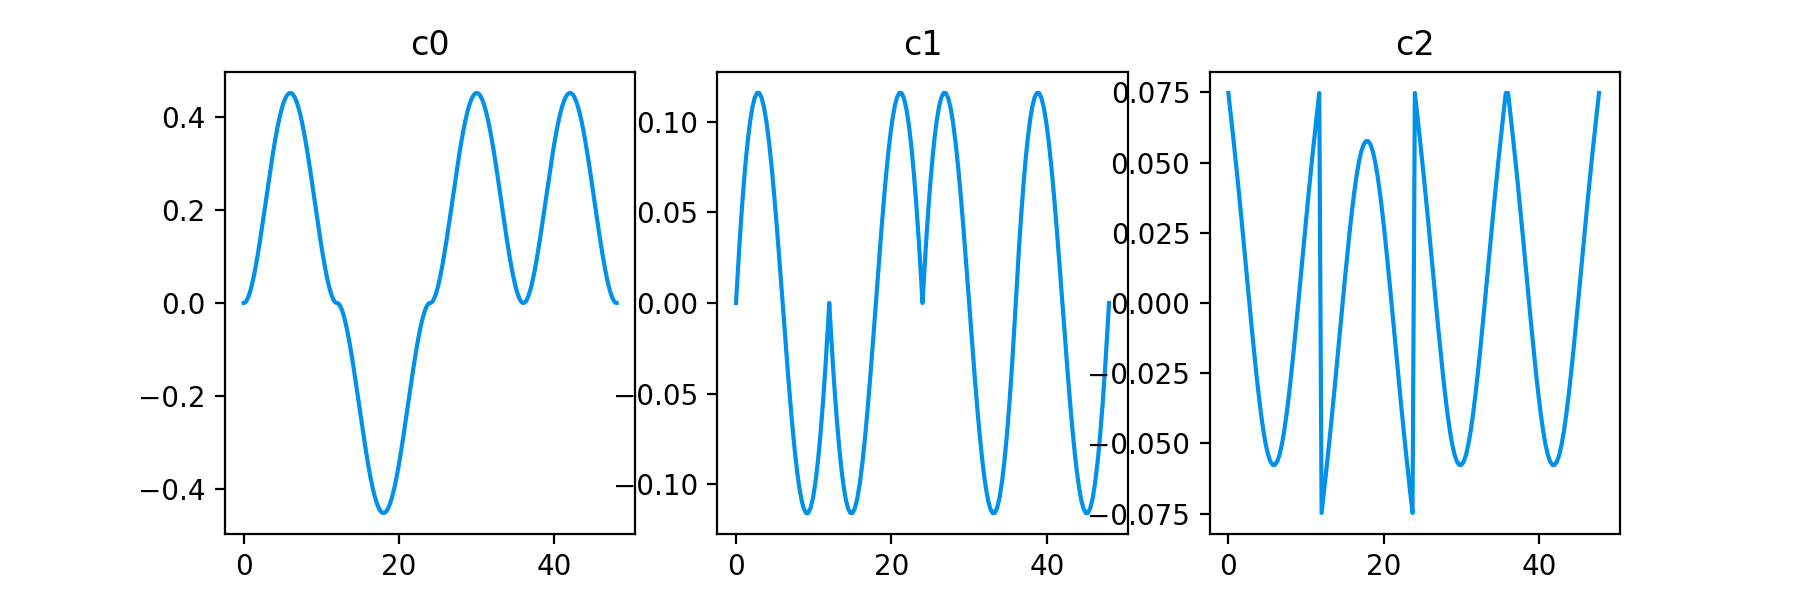

Text(0.5, 1.0, 'c2')

In [52]:
# plots of Euler angles and angular velocities

fig, axes = plt.subplots(1, 3, figsize = (9, 3), sharex = True)
axes = np.reshape(axes, -1)

axes[0].plot(np.arange(0,dt*(len(traj_ss) - 0.5),dt), traj_ss.T[8], color = colors[0][1])
axes[0].set_title('c0')

axes[1].plot(np.arange(0,dt*(len(traj_ss) - 0.5),dt), traj_ss.T[9], color = colors[0][1])
axes[1].set_title('c1')

axes[2].plot(np.arange(0,control_time0*(len(FULL_CTL_SEQ) - 0.5),control_time0), FULL_CTL_SEQ, color = colors[0][1])
axes[2].set_title('c2')
    
#axes[0].set_xlim(T/2-0.01, T/2+0.01)

<IPython.core.display.Javascript object>


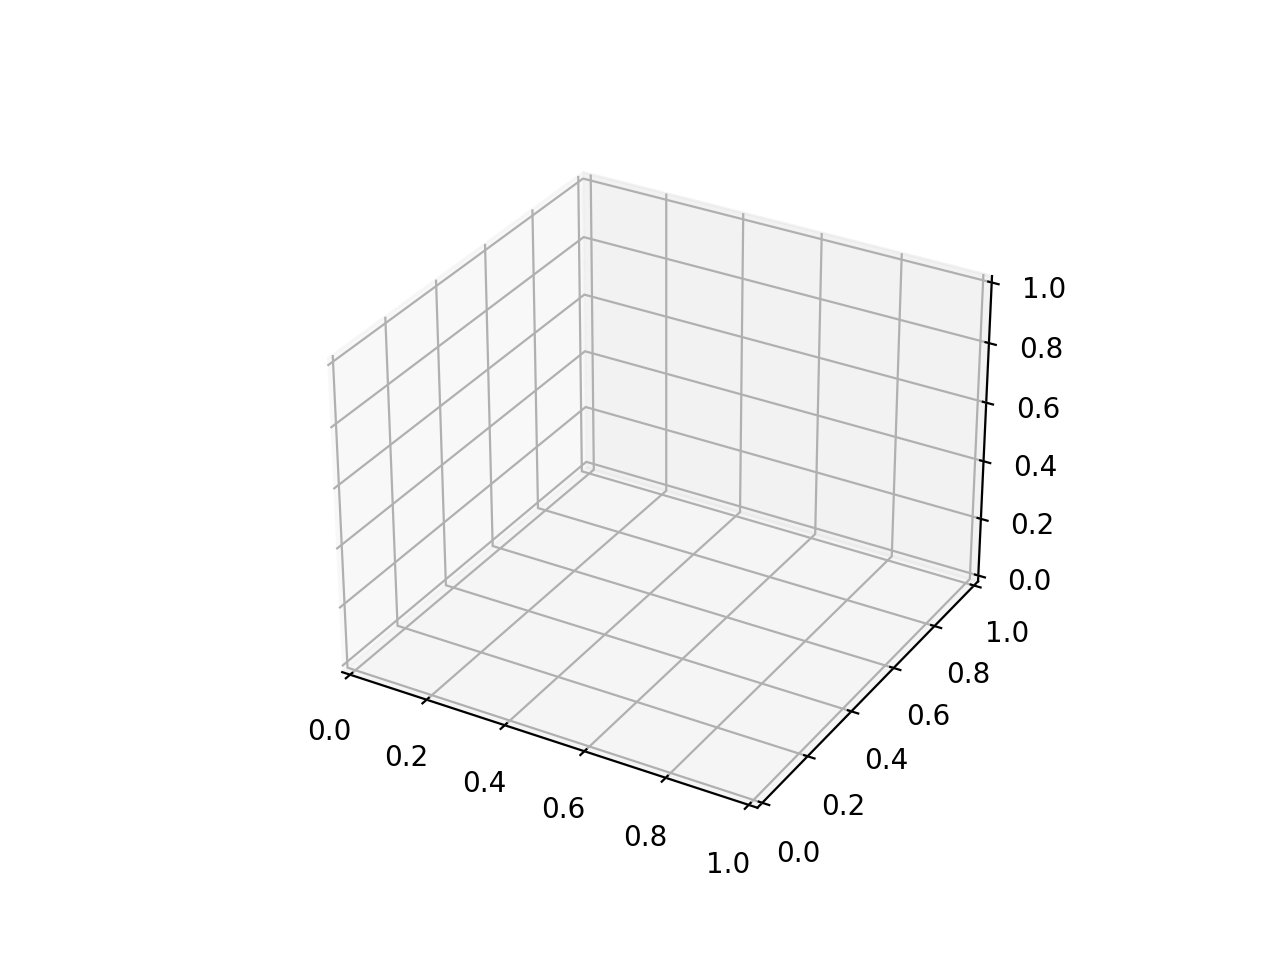

In [51]:
# makes images of the wheel rolling, which can be compiled together into a video

ax = plt.figure().add_subplot(projection='3d')

os.makedirs('frames', exist_ok = True)
skip_N = 20

for i in range(len(traj_ss)):
    
    if i % skip_N == 0:
        print("Progress: {0:.1f}%".format(100 * i/len(traj_ss)), end = '\r')
        
        M.DrawCircle(ax, traj_ss[i])
        
        ax.plot(np.array(traj_GC[:i,0]),
                np.array(traj_GC[:i,1]),
                np.array(traj_GC[:i,2]),
                color = 'red', zorder = 1)
        
        ax.plot(np.array(traj_CT[:i,0]),
                np.array(traj_CT[:i,1]),
                np.array(traj_CT[:i,2]),
                color = 'black', zorder = 1)
        
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
    
        ax.set_xlim(traj_GC[i,0] - 3, traj_GC[i,0] + 3)
        ax.set_ylim(traj_GC[i,1] - 3, traj_GC[i,1] + 3)
        #ax.set_xlim(- 4, + 4)
        #ax.set_ylim(- 4, + 4)
        ax.set_zlim(0, 6)
    
        plt.savefig('frames/{0:05d}.png'.format(i//skip_N))
        
        ax.clear()